In [1]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm
from scipy.spatial import Delaunay

from utils import *


import matplotlib as mpl

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

In [3]:
# mixture of co-utilizer and co-utilizing-"smart diauxer". - by 50/50
N_community = 10000
logD = log(100)
init = 100
coeff = 1e-4
frac_cout = 0.5

data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        x = np.zeros([N, R])
        for i in range(N):
            for j in range(R):
                x[i, pref_list[i, j]-1] = init * (coeff**j) # everything is smrt diauxer at this point
        index_cout = random.choices([True, False], weights=[frac_cout, 1-frac_cout], k=R)
        x[index_cout, :] = 1
        dep_orders = np.array(list(itertools.permutations(list(range(1, R+1)))))
        N_dep_order = len(dep_orders)
        community["g"], community["x"] = g, x
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat_co(g, x, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
    
filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal.pkl"
pickle.dump(data, open(filename, "wb"))

  3%|▎         | 259/10000 [00:00<00:03, 2590.00it/s]

100%|██████████| 10000/10000 [1:00:29<00:00,  2.75it/s]


In [ ]:
# mixture of other fractions
N_community = 5000
logD = log(100)
init = 100
coeff = 1e-4
frac_cout = 0.25

data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        x = np.zeros([N, R])
        for i in range(N):
            for j in range(R):
                x[i, pref_list[i, j]-1] = init * (coeff**j) # everything is smrt diauxer at this point
        index_cout = random.choices([True, False], weights=[frac_cout, 1-frac_cout], k=R)
        x[index_cout, :] = 1
        dep_orders = np.array(list(itertools.permutations(list(range(1, R+1)))))
        N_dep_order = len(dep_orders)
        community["g"], community["x"] = g, x
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat_co(g, x, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
    
filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_25-75.pkl"
pickle.dump(data, open(filename, "wb"))

In [ ]:
N_community = 5000
logD = log(100)
init = 100
coeff = 1e-4
frac_cout = 0.75

data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        x = np.zeros([N, R])
        for i in range(N):
            for j in range(R):
                x[i, pref_list[i, j]-1] = init * (coeff**j) # everything is smrt diauxer at this point
        index_cout = random.choices([True, False], weights=[frac_cout, 1-frac_cout], k=R)
        x[index_cout, :] = 1
        dep_orders = np.array(list(itertools.permutations(list(range(1, R+1)))))
        N_dep_order = len(dep_orders)
        community["g"], community["x"] = g, x
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat_co(g, x, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
    
filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_75-25.pkl"
pickle.dump(data, open(filename, "wb"))

In [2]:
# diversity versus stability
data = {"smart_diauxer":[[], []], "random_diauxer":[[], []], "coutilizer":[[], []]}

N_community = 10000
logD = log(100)

# smart diauxer

for R in range(2, 7):
    N = R
    filename = "smart_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_dep_order"]!=[]):
            for dep_order in item["possible_dep_order"]:
                g, pref_list = item["g"], item["pref_list"]
                F = F_mat(g, pref_list, dep_order, logD, N, R)
                G = G_mat(g, pref_list, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat(g, dep_order, G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["smart_diauxer"][0].append(success_rate)
    data["smart_diauxer"][1].append([stability, err])
    print(stability, success_rate)

# uniform coutilizer
for R in range(2, 7):
    N = R
    filename = "uniformcoutilizer_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["coutilizer"][0].append(success_rate)
    data["coutilizer"][1].append([stability, err])
    print(stability, success_rate)

# mixture of smart diaux and uniform cout
data["mixture"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture"][0].append(success_rate)
    data["mixture"][1].append([stability, err])
    print(stability, success_rate)

-1.1156635452432992 0.4982
-1.1199446335007641 0.2414
-1.107476306266123 0.1179
-1.1169491365334832 0.0538
-1.1043009560713852 0.0248
-1.7320101410878939 0.4996
-1.8054003733362596 0.2525
-1.885494063377807 0.1265
-1.9385404375936874 0.0605
-1.9665066034174288 0.0299
-1.263157317959852 0.4783
-1.411144355179045 0.2215
-1.4706826506498636 0.0977
-1.5571664842467456 0.0303
-1.6728537890194428 0.013


[-0.0015662811355311203, -0.015202742910707194, -0.02539620791296726, -0.06509774167768603, -0.10039834085387778] [-1.1156635452432992, -1.1199446335007641, -1.107476306266123, -1.1169491365334832, -1.1043009560713852]
[-0.00034757463392091225, 0.004321373782642578, 0.005180512503780314, -0.014124642691606345, -0.019178833355664383] [-1.7320101410878939, -1.8054003733362596, -1.885494063377807, -1.9385404375936874, -1.9665066034174288]
[-0.019269623464054652, -0.05256627811294924, -0.10701544928928336, -0.3144373888417702, -0.3809066693732573] [-1.263157317959852, -1.411144355179045, -1.4706826506498636, -1.5571664842467456, -1.6728537890194428]


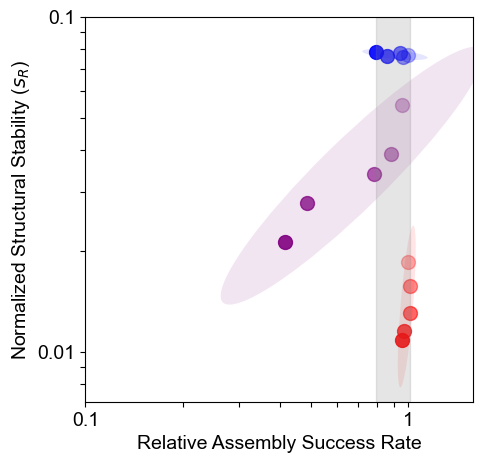

In [10]:
from matplotlib.patches import Ellipse
import matplotlib as mpl

alpha_list = np.arange(0.3, 1, 0.15)

# color_list = ["b", "g", "y", "orange", "r"]
# keys_list = ["smart_diauxer", "mixture_2", "mixture", "mixture_1", "coutilizer"]
# legend_list = ["Smart Diauxers", "75% Smart Diauxers", "50%-50%", "75% Coutilizers", "Coutilizers"]
color_list = ["b", "r", "purple"]
keys_list = ["smart_diauxer", "coutilizer", "mixture"]
legend_list = ["Sequential - Smart", "Coutilization", "50%-50% Mixture"]

plt.rcParams["figure.figsize"] = [5, 5]
fig, ax1 = plt.subplots()

for k_ind, k in enumerate(keys_list):
    for i in range(4):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind])
    for i in range(4, 5):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind], label=legend_list[k_ind])

for i, key in enumerate(keys_list):
    x_group, y_group = [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    print(x_group, y_group)
    center = np.mean([x_group, y_group], axis=1)
    cov_matrix = np.cov(x_group, y_group)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 5*np.sqrt(eigenvalues)
    ellipse = Ellipse(center, width, height, angle=angle, facecolor=color_list[i], alpha=0.1)
    ax1.add_patch(ellipse)

s1 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["smart_diauxer"][0])]
s2 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["coutilizer"][0])]
left_x = min(s1+s2)
right_x = max(s1+s2)
ax1.axvspan(left_x, right_x, alpha=0.2, color='gray', label='Region between lines')

xlo, xhi, ylo, yhi = -1, 0.2, -2.15, -1
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
ax1.set_xticks(a, b)
a, b = ticking(ylo, yhi)
ax1.set_yticks(a, b)

ax1.set_xlabel("Relative Assembly Success Rate")
ax1.set_ylabel("Normalized Structural Stability ($s_R$)")
plt.savefig("figures/mixture_clouds_1.pdf", bbox_inches="tight")

In [19]:
# gradually strengthen the coutilizers
for idx, i_s in enumerate([1.1, 1.3]):
    N_community = 10000
    logD = log(100)
    init = 100
    coeff = 1e-4
    frac_cout = 0.5

    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))

    data = []
    for R in range(2, 7):
        N = R
        for item in data_sub:
            if(item["R"]==R):
                communities_ref = item["communities"]
        communities = []
        stabilities = []
        for i in tqdm(range(N_community)):
            community = {}
            g, x = communities_ref[i]["g"], communities_ref[i]["x"]
            g[x==1] *= i_s
            dep_orders = np.array(list(itertools.permutations(list(range(1, R+1)))))
            N_dep_order = len(dep_orders)
            community["g"], community["x"] = g, x
            community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
            community["allowed_orders"] = dep_orders
            community["possible_orders"] = []
            for j in range(N_dep_order):
                dep_order = dep_orders[j]
                G = G_mat_co(g, x, dep_order, N, R)
                if(np.linalg.matrix_rank(G)>=N):
                    t = np.linalg.inv(G)@np.ones(R)*logD
                    if(sum(t>0) >= len(t)):
                        community["possible_orders"].append(dep_order)
            communities.append(community)
        data.append({"R":R, "logD":logD, "communities":communities})
        
    filename = f"smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_cout_upgrade_{2*idx+1}.pkl"
    pickle.dump(data, open(filename, "wb"))

100%|██████████| 10000/10000 [1:00:31<00:00,  2.75it/s]


In [ ]:
data["mixture_0.2"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture"][0].append(success_rate)
    data["mixture"][1].append([stability, err])
    print(stability, success_rate)

In [11]:
# diversity versus stability
data = {"smart_diauxer":[[], []], "random_diauxer":[[], []], "coutilizer":[[], []]}

N_community = 10000
logD = log(100)

# smart diauxer
for R in range(2, 7):
    N = R
    filename = "smart_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_dep_order"]!=[]):
            for dep_order in item["possible_dep_order"]:
                g, pref_list = item["g"], item["pref_list"]
                F = F_mat(g, pref_list, dep_order, logD, N, R)
                G = G_mat(g, pref_list, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat(g, dep_order, G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["smart_diauxer"][0].append(success_rate)
    data["smart_diauxer"][1].append([stability, err])
    print(stability, success_rate)


# uniform coutilizer
for R in range(2, 7):
    N = R
    filename = "uniformcoutilizer_heatmap_diagonal.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["coutilizer"][0].append(success_rate)
    data["coutilizer"][1].append([stability, err])
    print(stability, success_rate)

# mixture of smart diaux and uniform cout
data["mixture_0.1"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_cout_upgrade_1.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture_0.1"][0].append(success_rate)
    data["mixture_0.1"][1].append([stability, err])
    print(stability, success_rate)

data["mixture_0.2"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_cout_upgrade_2.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture_0.2"][0].append(success_rate)
    data["mixture_0.2"][1].append([stability, err])
    print(stability, success_rate)

data["mixture_0.3"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_cout_upgrade_3.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture_0.3"][0].append(success_rate)
    data["mixture_0.3"][1].append([stability, err])
    print(stability, success_rate)

data["mixture_0.4"] = [[], []]
for R in range(2, 7):
    N = R
    cut = int(R/2)
    filename = "smartdiauxer_and_uniformcoutilizer_heatmap_diagonal_cout_upgrade_4.pkl"
    data_sub = pickle.load(open(filename, "rb"))
    communities = []
    stabilities = []
    stable = 0
    for item in data_sub:
        if(item["R"]==R):
            communities = item["communities"]
            break
    for item in communities[:N_community]:
        if(item["possible_orders"]!=[]):
            for dep_order in  item["possible_orders"]:
                g, x = item["g"], item["x"]
                F = F_mat_co(g, x, dep_order, logD, N, R)
                G = G_mat_co(g, x, dep_order, N, R)
                t = np.linalg.inv(G)@np.ones(R)*logD
                env = {"N":N, "R":R, "logD":logD}
                if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat_co(g, x, list(dep_order), G, t, F, env))))) < 1+1e-9):
                    stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                    stable += 1
                    break
    success_rate = stable/N_community
    stability = np.mean(stabilities)
    err = np.std(stabilities)/sqrt(len(stabilities))
    data["mixture_0.4"][0].append(success_rate)
    data["mixture_0.4"][1].append([stability, err])
    print(stability, success_rate)

-1.1156635452432992 0.4982
-1.1199446335007641 0.2414
-1.107476306266123 0.1179
-1.1169491365334832 0.0538
-1.1043009560713852 0.0248
-1.7320101410878939 0.4996
-1.8054003733362596 0.2525
-1.885494063377807 0.1265
-1.9385404375936874 0.0605
-1.9665066034174288 0.0299
-1.236294770881618 0.4641
-1.3522915291051092 0.2284
-1.411792806173608 0.108
-1.4549683595431688 0.0506
-1.5335615810128391 0.0235
-1.2420605765554646 0.4292
-1.3408488618902574 0.1966
-1.3527045438866836 0.0937
-1.4486799460030548 0.0453
-1.4212137886415777 0.0213
-1.2747091022408048 0.3849
-1.3458242010969934 0.1482
-1.3458364297892564 0.0634
-1.390535418673629 0.0253
-1.4442725907499294 0.0089
-1.323889365963465 0.3498
-1.4015501668948545 0.1089
-1.3769811849866376 0.0402
-1.4289241307580711 0.0112
-1.5063327380100109 0.0037


[-0.0015662811355311203, -0.015202742910707194, -0.02539620791296726, -0.06509774167768603, -0.10039834085387778] [-1.1156635452432992, -1.1199446335007641, -1.107476306266123, -1.1169491365334832, -1.1043009560713852]
[-0.00034757463392091225, 0.004321373782642578, 0.005180512503780314, -0.014124642691606345, -0.019178833355664383] [-1.7320101410878939, -1.8054003733362596, -1.885494063377807, -1.9385404375936874, -1.9665066034174288]
[-0.026872146400301365, -0.03385826726096737, -0.054531414868180264, -0.0695604052332999, -0.09691001300805639] [-1.2468761168118363, -1.3724190040918858, -1.4362141029687354, -1.4405319284273248, -1.542617569531035]


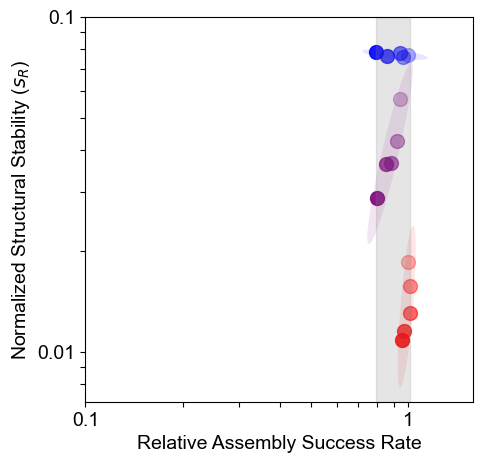

In [25]:
from matplotlib.patches import Ellipse
import matplotlib as mpl

alpha_list = np.arange(0.3, 1, 0.15)

# color_list = ["b", "g", "y", "orange", "r"]
# keys_list = ["smart_diauxer", "mixture_2", "mixture", "mixture_1", "coutilizer"]
# legend_list = ["Smart Diauxers", "75% Smart Diauxers", "50%-50%", "75% Coutilizers", "Coutilizers"]
color_list = ["b", "r", "purple"]
keys_list = ["smart_diauxer", "coutilizer", "mixture_0.1"]
legend_list = ["Sequential - Smart", "Coutilization", "50%-50% Mixture"]

plt.rcParams["figure.figsize"] = [5, 5]
fig, ax1 = plt.subplots()

for k_ind, k in enumerate(keys_list):
    for i in range(4):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind])
    for i in range(4, 5):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind], label=legend_list[k_ind])

for i, key in enumerate(keys_list):
    x_group, y_group = [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    print(x_group, y_group)
    center = np.mean([x_group, y_group], axis=1)
    cov_matrix = np.cov(x_group, y_group)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 5*np.sqrt(eigenvalues)
    ellipse = Ellipse(center, width, height, angle=angle, facecolor=color_list[i], alpha=0.1)
    ax1.add_patch(ellipse)

s1 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["smart_diauxer"][0])]
s2 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["coutilizer"][0])]
left_x = min(s1+s2)
right_x = max(s1+s2)
ax1.axvspan(left_x, right_x, alpha=0.2, color='gray', label='Region between lines')

xlo, xhi, ylo, yhi = -1, 0.2, -2.15, -1
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
ax1.set_xticks(a, b)
a, b = ticking(ylo, yhi)
ax1.set_yticks(a, b)
ax1.set_xlabel("Relative Assembly Success Rate")
ax1.set_ylabel("Normalized Structural Stability ($s_R$)")
plt.savefig("figures/mixture_clouds_2.pdf", bbox_inches="tight")

[-0.0015662811355311203, -0.015202742910707194, -0.02539620791296726, -0.06509774167768603, -0.10039834085387778] [-1.1156635452432992, -1.1199446335007641, -1.107476306266123, -1.1169491365334832, -1.1043009560713852]
[-0.00034757463392091225, 0.004321373782642578, 0.005180512503780314, -0.014124642691606345, -0.019178833355664383] [-1.7320101410878939, -1.8054003733362596, -1.885494063377807, -1.9385404375936874, -1.9665066034174288]
[-0.11362209324142784, -0.22709180502872825, -0.2948207551263237, -0.3927594961682573, -0.5454600150351813] [-1.2747091022408048, -1.3458242010969934, -1.3458364297892564, -1.390535418673629, -1.4442725907499294]


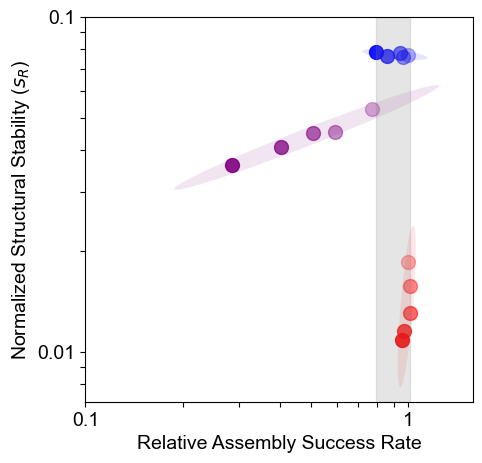

In [26]:
from matplotlib.patches import Ellipse
import matplotlib as mpl

alpha_list = np.arange(0.3, 1, 0.15)

# color_list = ["b", "g", "y", "orange", "r"]
# keys_list = ["smart_diauxer", "mixture_2", "mixture", "mixture_1", "coutilizer"]
# legend_list = ["Smart Diauxers", "75% Smart Diauxers", "50%-50%", "75% Coutilizers", "Coutilizers"]
color_list = ["b", "r", "purple"]
keys_list = ["smart_diauxer", "coutilizer", "mixture_0.3"]
legend_list = ["Sequential - Smart", "Coutilization", "50%-50% Mixture"]

plt.rcParams["figure.figsize"] = [5, 5]
fig, ax1 = plt.subplots()

for k_ind, k in enumerate(keys_list):
    for i in range(4):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind])
    for i in range(4, 5):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s = 100, alpha = alpha_list[i], color=color_list[k_ind], label=legend_list[k_ind])

for i, key in enumerate(keys_list):
    x_group, y_group = [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    print(x_group, y_group)
    center = np.mean([x_group, y_group], axis=1)
    cov_matrix = np.cov(x_group, y_group)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 5*np.sqrt(eigenvalues)
    ellipse = Ellipse(center, width, height, angle=angle, facecolor=color_list[i], alpha=0.1)
    ax1.add_patch(ellipse)

s1 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["smart_diauxer"][0])]
s2 = [log10(i*(2**(idx+1))) for idx, i in enumerate(data["coutilizer"][0])]
left_x = min(s1+s2)
right_x = max(s1+s2)
ax1.axvspan(left_x, right_x, alpha=0.2, color='gray', label='Region between lines')

xlo, xhi, ylo, yhi = -1, 0.2, -2.15, -1
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
ax1.set_xticks(a, b)
a, b = ticking(ylo, yhi)
ax1.set_yticks(a, b)
ax1.set_xlabel("Relative Assembly Success Rate")
ax1.set_ylabel("Normalized Structural Stability ($s_R$)")
plt.savefig("figures/mixture_clouds_3.pdf", bbox_inches="tight")